In [1]:
!pip install --user opencv-contrib-python

In [2]:
import cv2
from PIL import Image, ImageDraw 
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

## Скачать цветное изображение по выбору с нарушенным цветовым балансом (желательно, чтобы на изображении был объект предположительно белого цвета).

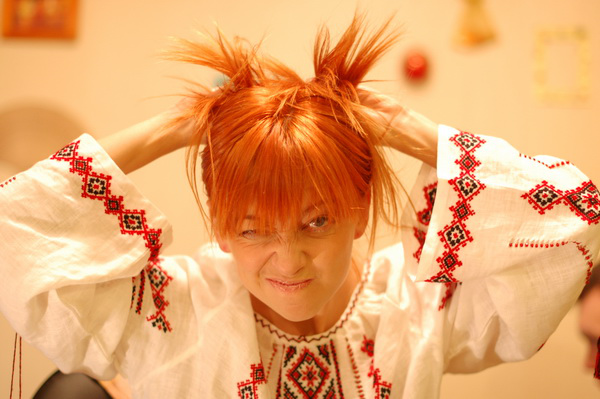

In [20]:
src_image_name = 'src.jpg'
image = Image.open(src_image_name) 
image

## Определить вручную цвет объекта, построить преобразование (матрицу 3х3) для коррекции белого. Применить к изображению. Не забудьте про нормировку яркости (если она будет нужна).

Recomended:

Input pixel width: 6

Input pixel height: 242

In [21]:
pix_width = int(input('Input pixel width: '))
pix_height = int(input('Input pixel height: '))

Input pixel width: 6
Input pixel height: 242


In [22]:
def norm(v):
    if v > 255:
        return 255
    elif v < 0:
        return 0
    
    return int(v)

def getPoint(imageName, outName):
    image = Image.open(imageName)
    new_img = Image.new('RGB', ( image.width, image.height )) 
    pix1 = image.load()
    draw = ImageDraw.Draw(new_img) 
    
    r1 = 255/pix1[pix_width, pix_height][0]
    g1 = 255/pix1[pix_width, pix_height][1]
    b1 = 255/pix1[pix_width, pix_height][2]
    
    for i in range(image.width):
        for j in range(image.height):
            r = pix1[i, j][0]
            g = pix1[i, j][1]
            b = pix1[i, j][2]
            draw.point((i, j), (norm(r*r1), norm(g*g1), norm(b*b1)))

    return new_img

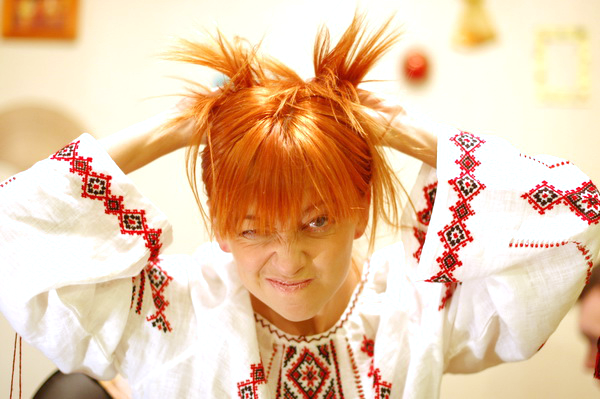

In [23]:
img_name_step_1 = 'img-white-point.jpg'

white_point_image = getPoint(src_image_name,img_name_step_1)
white_point_image.save(img_name_step_1)
white_point_image

## Исходное изображение скорректировать согласно теории Серого мира вручную.

In [24]:
def gray_world_proc(input_image_name):
    image = Image.open(input_image_name)
    new_img = Image.new('RGB', ( image.width, image.height )) 
    pix1 = image.load()
    draw = ImageDraw.Draw(new_img) 

    _sum = 0
    _R = 0
    _G = 0
    _B = 0
    AVG = 0
    
    #count average
    for i in range(image.width):
        for j in range(image.height):
            r = pix1[i, j][0]
            g = pix1[i, j][1]
            b = pix1[i, j][2]
            _sum+=1
            
            _R+=r
            _G+=g
            _B+=b
    
    if _sum != 0:
        _R = _R/_sum
        
    if _sum != 0:
        _G = _G/_sum
        
    if _sum != 0:
        _B = _B/_sum
        
    AVG = (_R + _G + _B)/3    
            
    kR = 0
    kG = 0
    kB = 0
    
    if _R != 0:
        kR = AVG/_R

    if _G != 0:
        kG = AVG/_G  
        
    if _B != 0:
        kB = AVG/_B      
   
    for i in range(image.width):
        for j in range(image.height):
            r = pix1[i, j][0]
            g = pix1[i, j][1]
            b = pix1[i, j][2]
            draw.point((i, j), (int(r*kR), int(g*kG), int(b*kB)))

    return new_img

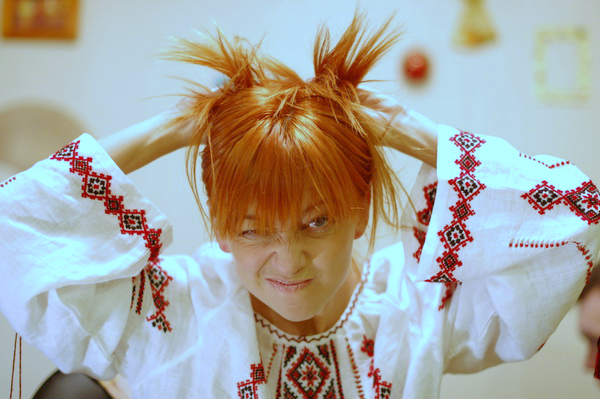

In [25]:
img_name_step_2 = 'gray-img-manually.jpg'

gray_image = gray_world_proc(src_image_name)
gray_image.save(img_name_step_2)
gray_image

## Исходное изображение скорректировать согласно теории Серого мира при помощи библиотечной функции.

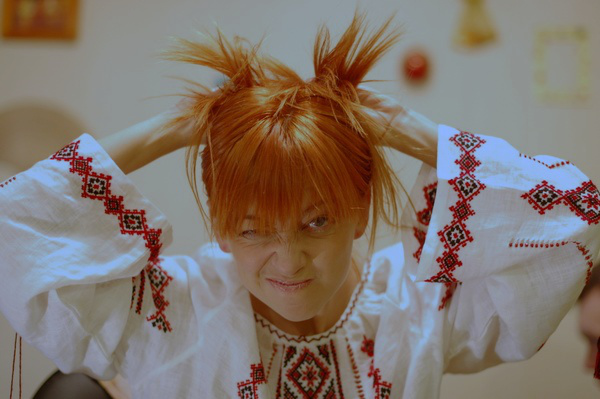

In [26]:
img_name_step_3 = 'gray-img-lib.jpg'

image = cv2.imread(src_image_name)
wb = cv2.xphoto.createGrayworldWB()
wb.setSaturationThreshold(0.7)
image_fixed = wb.balanceWhite(image)
cv2.imwrite(img_name_step_3, image_fixed)

image_fixed = Image.open(img_name_step_3)
image_fixed

## Все результаты вывести на экран рядом для визуального сравнения

Text(0.5, 1.0, 'Теория серого мира - библиотчная функция')

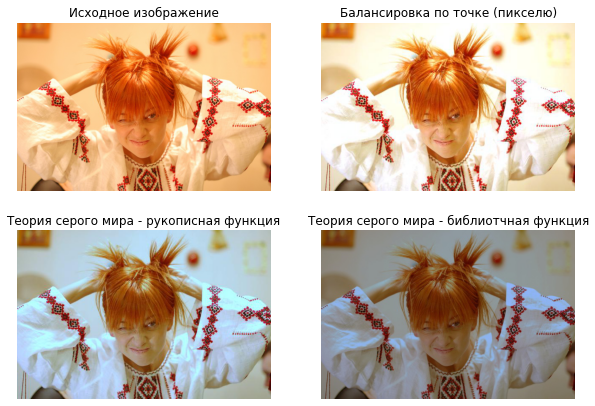

In [27]:
fig = plt.figure(figsize=(10, 7))
  
rows = 2
columns = 2
  
source = mpimg.imread(src_image_name)
point = mpimg.imread(img_name_step_1)
gray = mpimg.imread(img_name_step_2)
library_gray = mpimg.imread(img_name_step_3)
  
fig.add_subplot(rows, columns, 1)
  
plt.imshow(source)
plt.axis('off')
plt.title("Исходное изображение")
  
fig.add_subplot(rows, columns, 2)
  
plt.imshow(point)
plt.axis('off')
plt.title("Балансировка по точке (пикселю)")
  
fig.add_subplot(rows, columns, 3)
  
plt.imshow(gray)
plt.axis('off')
plt.title("Теория серого мира - рукописная функция")
  
fig.add_subplot(rows, columns, 4)
  
plt.imshow(library_gray)
plt.axis('off')
plt.title("Теория серого мира - библиотчная функция")